# GA 2.8: [Ice Ice Baby](https://www.youtube.com/watch?v=rog8ou-ZepE), Part 1

<h1 style="position: absolute; display: flex; flex-grow: 0; flex-shrink: 0; flex-direction: row-reverse; top: 60px;right: 30px; margin: 0; border: 0">
    <style>
        .markdown {width:100%; position: relative}
        article { position: relative }
    </style>
    <img src="https://gitlab.tudelft.nl/mude/public/-/raw/main/tu-logo/TU_P1_full-color.png" style="width:100px" />
    <img src="https://gitlab.tudelft.nl/mude/public/-/raw/main/mude-logo/MUDE_Logo-small.png" style="width:100px" />
</h1>
<h2 style="height: 10px">
</h2>

*[CEGM1000 MUDE](http://mude.citg.tudelft.nl/): Week 2.8, January 17, 2025.*

In this notebook our goal is to get a handle on the uncertainty associated with _when_ the ice breaks each year. Because they are roughly _independent_, we will consider these two times separately:

1. the day on which the ice breaks
2. the minute of the day on which the ice breaks

Note that we will use April 1 as a reference day, such that minute 0 (in Python indexing) corresponds to 00:00 on April 1.

Note also the following historical information about the ice classic (relative to the reference provided above):

- The $\mu$ and $\sigma$ of the day is: 33 and 6.5
- The $\mu$ and $\sigma$ of the minute in the day is 863, and 190

Maybe it's also handy to recall that there are 1440 minutes in a day. Running the following code snippet will convince you that 863 corresponds to the time 14:23.

```python
print(f"The hour is: {863 // 60}")
print(f"The minute is: {863 % 60}")
```

Great, let's get started! The first task is to get a handle on the probability associated with picking the right minute in the Ice Classic.

In [1]:
%load_ext autoreload
%autoreload 2
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
from tools import *

## Part 1: Probability of Winning

To get started, we should get an order of magnitude estimate of the probability of winning the Ice Classic. This is the probability of guessing the exact minute of the breakup. First we will calculate the probability of guessing the exact day of the breakup, and then we will calculate the probability of guessing the exact minute of the breakup.

Note that the historic information of previous breakups can easily be seen on the [Nenana Ice Classic website brochure](https://www.nenanaakiceclassic.com/brochures). In particular, you can see the breakup primarily occurs in April and May, and that the time is generally in the early afternoon.

<div style="background-color:#AABAB2; color: black; vertical-align: middle; padding:15px; margin: 10px; border-radius: 10px; width: 95%">
<p>
<b>Task 1.1:</b>   

Using the information provided above, compute the probability exact day of the breakup will be the historical average. Assume that the distribution is Gaussian and don't forget that the distribution is continuous and you are interested in the entire <em>day</em> being correct.

</p>
</div>

In [2]:
# YOUR_CODE_HERE
# p_day = YOUR_CODE_HERE
# print(f"P[day = historical average] = {p_day:.4f}")


# SOLUTION
day_dist = stats.norm(loc=33, scale=6.5)
p_day =day_dist.cdf(33) - day_dist.cdf(32)
print(f"P[day = historical average] = {p_day:.4f}")

P[day = historical average] = 0.0611


<div style="background-color:#AABAB2; color: black; vertical-align: middle; padding:15px; margin: 10px; border-radius: 10px; width: 95%">
<p>
<b>Task 1.2:</b>   

Using the information provided above, compute the probability exact <em>minute</em> of the breakup will be the historical average. Assume that the distribution is Gaussian.

</p>
</div>

In [3]:
# YOUR_CODE_HERE
# p_min = YOUR_CODE_HERE
# print(f"P[min = historical average] = {p_min:.4f}")

# SOLUTION
min_dist = stats.norm(loc=863, scale=190)
p_min = min_dist.cdf(863) - min_dist.cdf(862)
print(f"P[min = historical average] = {p_min:.4f}")

P[min = historical average] = 0.0021


<div style="background-color:#AABAB2; color: black; vertical-align: middle; padding:15px; margin: 10px; border-radius: 10px; width: 95%">
<p>
<b>Task 1.3:</b>   

Compute the probability that the actual breakup time is the historical average.

<em>Hint: assume the day and minute are independent and if you think hard about Week 1.8 you might remember that you can probably make your life easier by assuming the joint probability is the union or intersection...</em>
</p>
</div>

In [4]:
# p_day_and_min = YOUR_CODE_HERE
# print(f"P[day and min] = {p_day_and_min:.4f}")

# SOLUTION
p_day_and_min = p_day*p_min
print(f"P[day and min] = {p_day_and_min:.4f}")

P[day and min] = 0.0001


You probably calculated a number in the previous task, and it's probably not very large. And now remember that this is the **mode** of the distribution! Let's compute a few other probabilities to get a sense for how much less likely it is to guess the exact minute of the breakup when it is _not_ the historical average.

<div style="background-color:#AABAB2; color: black; vertical-align: middle; padding:15px; margin: 10px; border-radius: 10px; width: 95%">
<p>
<b>Task 1.4:</b>   

Choose a minute that is less likely to occur (for example, April 16 at 3:33 AM) and evaluate the probabilities, comparing them to the mode.

</p>
</div>

In [5]:
print(f"P[day = historical average] = {p_day:.2e}")
print(f"P[min = historical average] = {p_min:.2e}")
print(f"P[day and min] = {p_day_and_min:3e}")

unlikely_day = 16
unlikely_min = 3*60 + 33
p_unlikely_day = day_dist.cdf(unlikely_day+0.5) - day_dist.cdf(unlikely_day-0.5)
p_unlikely_min = min_dist.cdf(unlikely_min+0.5) - min_dist.cdf(unlikely_min-0.5)
p_unlikely_day_and_min = p_unlikely_day*p_unlikely_min
print(f"P[unlikely day] = {p_unlikely_day:.2e}")
print(f"P[unlikely min] = {p_unlikely_min:.2e}")
print(f"P[unlikely day and min] = {p_unlikely_day_and_min:.2e}")

P[day = historical average] = 6.11e-02
P[min = historical average] = 2.10e-03
P[day and min] = 1.283632e-04
P[unlikely day] = 2.02e-03
P[unlikely min] = 6.04e-06
P[unlikely day and min] = 1.22e-08


<div style="background-color:#AABAB2; color: black; vertical-align: middle; padding:15px; margin: 10px; border-radius: 10px; width: 95%">
<p>
<b>Task 1.5:</b>   
Reflect on the probabilities calculated above. Note in particular the order of magnitued of the probabilities and how they compare to each other.
</p>
</div>

_Your answer here._

<div style="background-color:#FAE99E; color: black; vertical-align: middle; padding:15px; margin: 10px; border-radius: 10px; width: 95%">
<p>
<b>Solution:</b>   

- 1 in 1000 doesn't seem to bad for the historical average! Better than the lottery, at least.
- Unfortunately it seems that this probability quickly drops, as the "unlikely" minute is over 5 orders of magnitude less likely than the historical average.
- if we could only make a single bet it's hopeless. But if we could make multiple bets...we might have a chance!
</p>
</div>

## Part 2: More than One Ticket

We've established that a single ticket is a long shot. The probability of guessing the winning minute is tiny. But what if we could make multiple guesses? We will explore that here, but first let's introduce ourselves to a tool that can help us choose tickets easily. Remember that each ticket costs $3.

The file `tools.py` contain some code that will help us easily choose different combinations of tickets and evaluate the probability that they are winners. The code is not very well documented, so don't bother reading it. Instead, we will introduce it below with a few examples, in particular the classes:
- `Minutes`: a class making it easily convert between minutes in a variety of formats
- `Tickets`: a class that makes it easy to choose tickets in a variety of ways
- `Models`: a class that helps with calculations of probability, etc, including plots

<div style="background-color:#AABAB2; color: black; vertical-align: middle; padding:15px; margin: 10px; border-radius: 10px; width: 95%">
<p>
<b>Task 2.1:</b>   

Run the code cell below to see how you can define a set of tickets using a "list of lists". The first example illustrates how you can select all of the minutes in a single day, in this case, day 34, which corresponds to May 4.

</p>
</div>

In [6]:
t = Tickets()
t.add([34])
t.status()

Name: no name
Reference: April 1
Days: 60
Number of tickets: 1440
Cost for all tickets: 4320.0



<div style="background-color:#AABAB2; color: black; vertical-align: middle; padding:15px; margin: 10px; border-radius: 10px; width: 95%">
<p>
<b>Task 2.2:</b>   

It turns out there is also an easy way to visualize which tickets we selected.

</p>
</div>

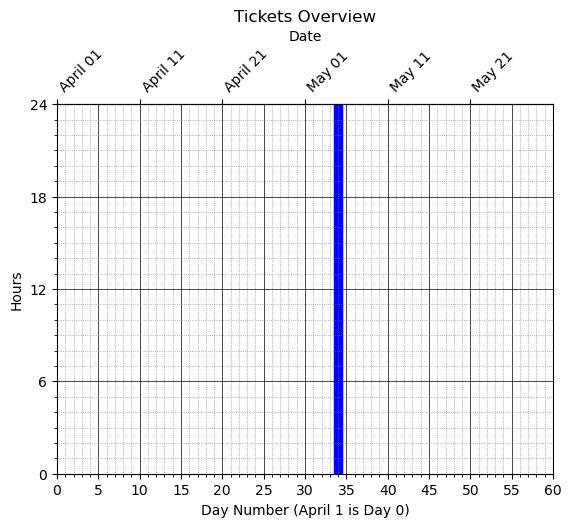

In [7]:
t.show()

<div style="background-color:#AABAB2; color: black; vertical-align: middle; padding:15px; margin: 10px; border-radius: 10px; width: 95%">
<p>
<b>Task 2.3:</b>   

Now lets try specifying a set of days.

<em>Note that this requires a list inside the list</em>

</p>
</div>

Name: no name
Reference: April 1
Days: 60
Number of tickets: 7200
Cost for all tickets: 21600.0



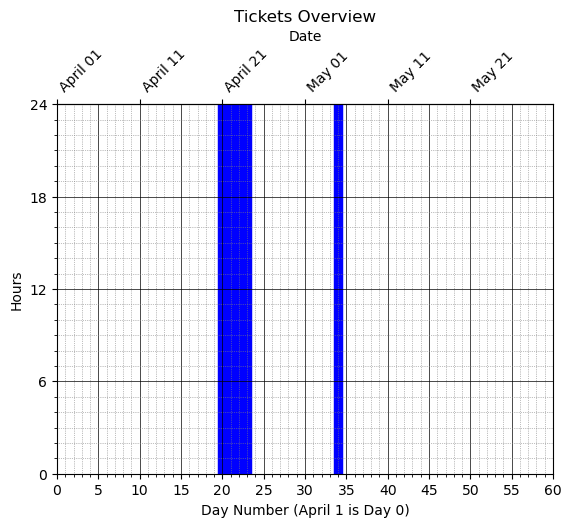

In [8]:
t.add([[20, 23]])
t.status()
t.show()

<div style="background-color:#AABAB2; color: black; vertical-align: middle; padding:15px; margin: 10px; border-radius: 10px; width: 95%">
<p>
<b>Task 2.4:</b>   

What if we want to include a subset of hours, rather than the entire day? Here we can add May 7, 14:00-16:00 to our existing ticket set.

</p>
</div>

Name: no name
Reference: April 1
Days: 60
Number of tickets: 7440
Cost for all tickets: 22320.0



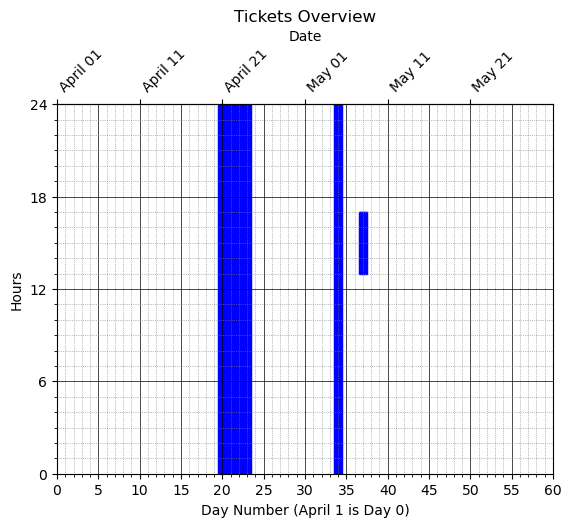

In [9]:
t.add([[37], [13, 16]])
t.status()
t.show()

<div style="background-color:#AABAB2; color: black; vertical-align: middle; padding:15px; margin: 10px; border-radius: 10px; width: 95%">
<p>
<b>Task 2.5:</b>   

It is also possible to add the same hours as before for <em>multiple</em> days.

</p>
</div>

Name: no name
Reference: April 1
Days: 60
Number of tickets: 8880
Cost for all tickets: 26640.0



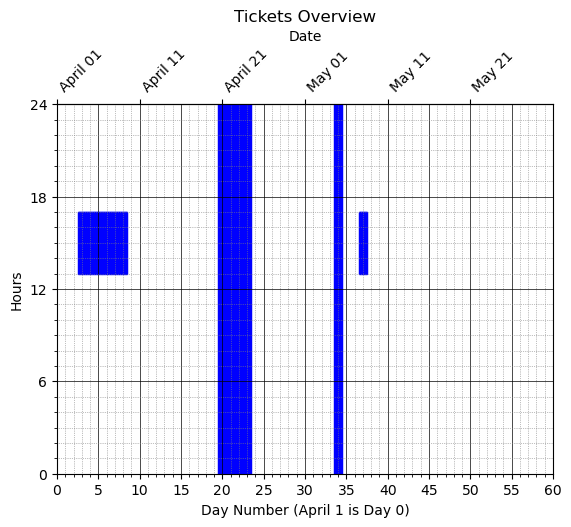

In [10]:
t.add([[3, 8], [13, 16]])
t.status()
t.show()

<div style="background-color:#AABAB2; color: black; vertical-align: middle; padding:15px; margin: 10px; border-radius: 10px; width: 95%">
<p>
<b>Task 2.6:</b>   

Yup, we can do it all with minutes too! Can you predict what the following code will do?

</p>
</div>

Name: no name
Reference: April 1
Days: 60
Number of tickets: 10244
Cost for all tickets: 30732.0



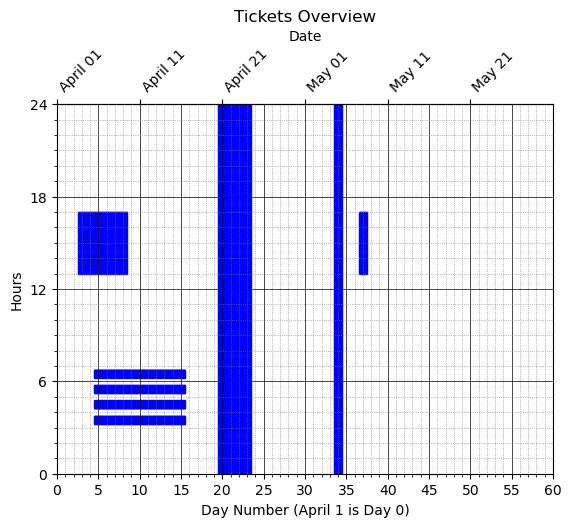

In [11]:
t.add([[5, 15], [3, 6], [15, 45]])
t.status()
t.show()


<div style="background-color:#AABAB2; color: black; vertical-align: middle; padding:15px; margin: 10px; border-radius: 10px; width: 95%">
<p>
<b>Task 2.7:</b>   

Finally, note that non-consecutive lists of day, hour and minute can also be used to add interesting patterns. 

</p>
</div>

Name: no name
Reference: April 1
Days: 60
Number of tickets: 10444
Cost for all tickets: 31332.0



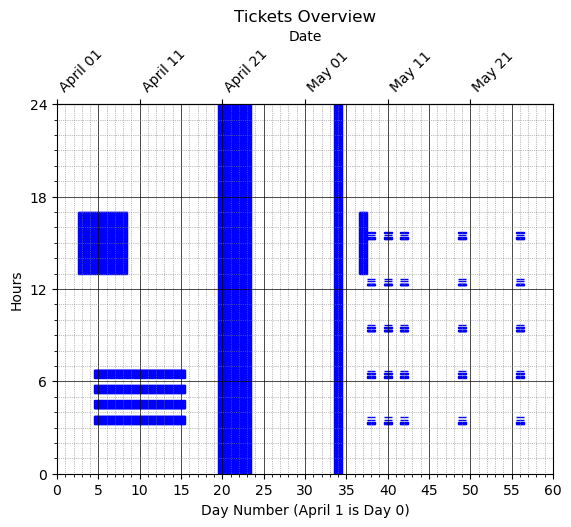

In [12]:
t.add([[38, 40, 42, 49, 56],
       [3, 6, 9, 12, 15],
       [15, 16, 17, 18, 19, 20, 30, 40]])
t.status()
t.show()

## Part 3: Probability

Specifying interesting combinations of tickets is nice, but what we are really interested in is...winning!

And to do that, we should have a firm understanding of the probability associated with our bets. The `Models` class allows us to calculate probability in a straightforward way. First we have to initialize it.

<div style="background-color:#AABAB2; color: black; vertical-align: middle; padding:15px; margin: 10px; border-radius: 10px; width: 95%">
<p>
<b>Task 3.1:</b>   

Run the cell below, but note that it may take a minute or two to run! This is because it is calculating the probability of winning for every possible ticket given the historical average of breakup and saving that information in a pickle file.

While you are waiting, see if you can guess what the ticket being selected it is an the order of magnitude of the probability that will be calculated.

</p>
</div>

The probability of the ticket is 4.979e-05
Name: no name
Reference: April 1
Days: 60
Number of tickets: 1
Cost for all tickets: 3.0



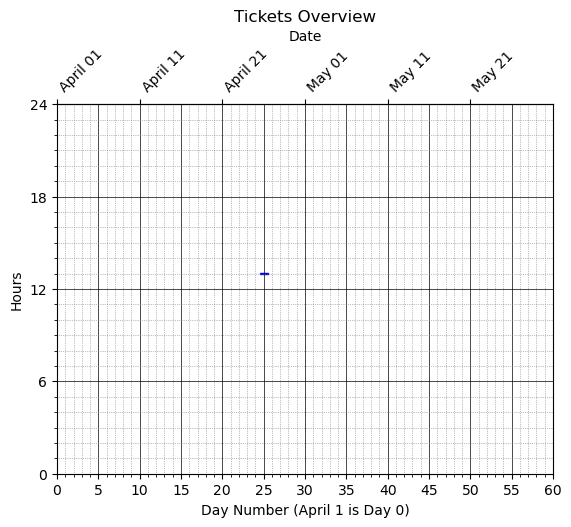

In [13]:
m = Models(model_id=2)
t_test = Tickets()
t_test.add([[25], [13], [0]])
p_ticket = m.get_p(t_test.tickets)
print(f"The probability of the ticket is {p_ticket:.3e}")
t_test.status()
t_test.show()

<div style="background-color:#AABAB2; color: black; vertical-align: middle; padding:15px; margin: 10px; border-radius: 10px; width: 95%">
<p>
<b>Task 3.2:</b>   

Returning to our previous (arbitrary) selection of tickets, we can calculate and visualize the probability of each ticket.

</p>
</div>

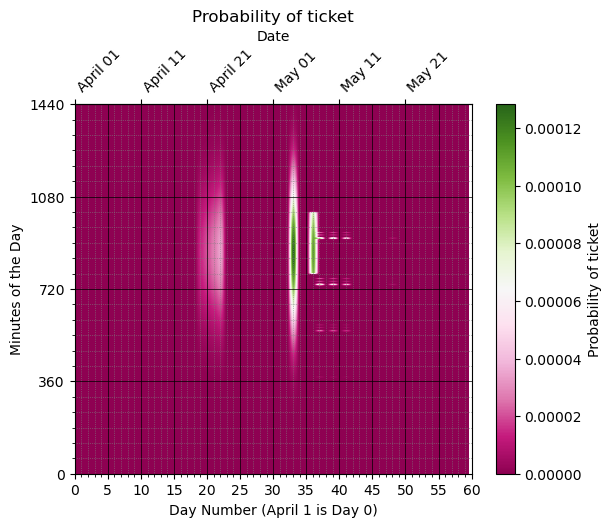

In [14]:
m = Models()
prob_T = np.zeros((len(t.tickets)))
for i, ti in enumerate(t.tickets):
    prob_T[i] = m.get_p([ti])

prob_T_matrix = m.map_data_to_day_min(prob_T, t.tickets)
m.plot(prob_T_matrix,
       custom_title="Probability of ticket",
       custom_label="Probability of ticket")

<div style="background-color:#AABAB2; color: black; vertical-align: middle; padding:15px; margin: 10px; border-radius: 10px; width: 95%">
<p>
<b>Task 3.3:</b>   

Using the array of probabilities found above, compute the probability of <em>any</em> of the tickets being a winner.

<em>Note: you actually have to do something in this task!</em>

</p>
</div>

In [15]:
# prob_any_T_wins = YOUR_CODE_HERE
# print(f"Prob of any ticket winning: {prob_any_T_wins:.3e}")

# SOLUTION
prob_any_T_wins = np.sum(prob_T)
print(f"Prob of any ticket winning: {prob_any_T_wins:.3e}")

Prob of any ticket winning: 1.361e-01


<div style="background-color:#AABAB2; color: black; vertical-align: middle; padding:15px; margin: 10px; border-radius: 10px; width: 95%">
<p>
<b>Task 3.4:</b>   

To close this notebook, check out the following visualization of the probability associated with every possible ticket. This information will be useful when you choose various ticket options later.
</p>
</div>

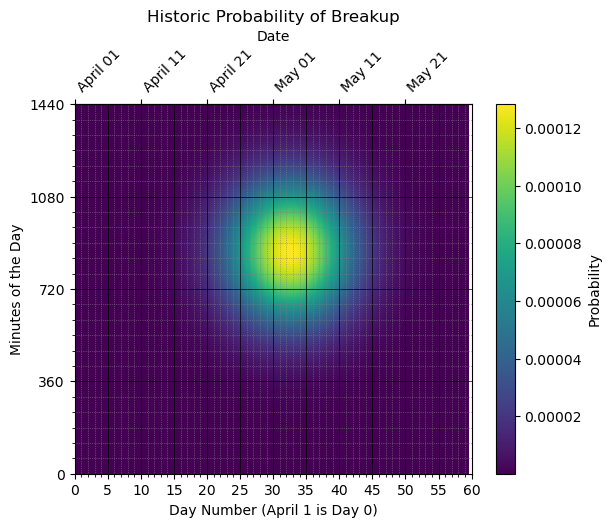

In [16]:
m.plot(0)

**End of notebook.**

<div style="margin-top: 50px; padding-top: 20px; border-top: 1px solid #ccc;">
  <div style="display: flex; justify-content: flex-end; gap: 20px; align-items: center;">
    <a rel="MUDE" href="http://mude.citg.tudelft.nl/">
      <img alt="MUDE" style="width:100px; height:auto;" src="https://gitlab.tudelft.nl/mude/public/-/raw/main/mude-logo/MUDE_Logo-small.png" />
    </a>
    <a rel="TU Delft" href="https://www.tudelft.nl/en/ceg">
      <img alt="TU Delft" style="width:100px; height:auto;" src="https://gitlab.tudelft.nl/mude/public/-/raw/main/tu-logo/TU_P1_full-color.png" />
    </a>
    <a rel="license" href="http://creativecommons.org/licenses/by/4.0/">
      <img alt="Creative Commons License" style="width:88px; height:auto;" src="https://i.creativecommons.org/l/by/4.0/88x31.png" />
    </a>
  </div>
  <div style="font-size: 75%; margin-top: 10px; text-align: right;">
    &copy; Copyright 2024 <a rel="MUDE" href="http://mude.citg.tudelft.nl/">MUDE</a> TU Delft. 
    This work is licensed under a <a rel="license" href="http://creativecommons.org/licenses/by/4.0/">CC BY 4.0 License</a>.
  </div>
</div>


<!--tested with WS_2_8_solution.ipynb-->